## standardization issues


In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../ml/"))

import scipy.io
import re
from dev_wtp_io_utils import get_Brain_Data_betas_for_sub
import pandas as pd

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
import numpy as np

In [3]:
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt
import nilearn as nil

from import_sst_cond_w1_subjs_to_pkl:

In [4]:
#load the matrix associated with this file
first_level_path='/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions'
sl_mat = scipy.io.loadmat(first_level_path + '/sub-DEV073/SPM.mat',
simplify_cells=True            
)
mat_betas = sl_mat['SPM']['Vbeta']

In [5]:
sl='DEV073'

## standarization

we have a problem with standardization. need to read in some raw files to make sense of it...

In [6]:
beta_series2 = nlt.Brain_Data(['/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0001.nii',
                              '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0002.nii'
                             ])

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,


In [7]:
bd_nifti = beta_series.to_nifti()
bd_fdata = bd_nifti.get_fdata()
img_count = bd_fdata.shape[3]
numpy_array = np.concatenate([bd_fdata[:,:,:,i] for i in range(img_count)],axis=0)


In [101]:
numpy_array.shape

(273, 109, 91)

In [102]:
nifti_concat = nil.image.new_img_like(beta_series[1,].to_nifti(),numpy_array)

In [103]:
subj_data = nlt.Brain_Data(nifti_concat
#                          ,mask=mask
                          )

In [104]:
subj_data.to_nifti().shape

(91, 109, 91)

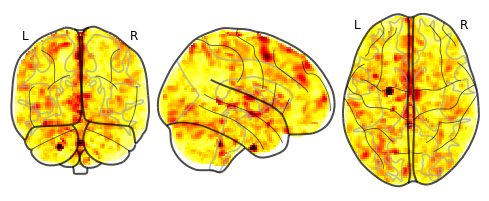

In [105]:
plotting.plot_glass_brain(subj_data.to_nifti())

In [106]:
import nibabel as nib

In [107]:
beta_based_mask = nil.masking.compute_brain_mask(beta_series[1,].to_nifti())

In [108]:
tmp="/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/"

In [109]:
img_count=2
mask_reshaped_numpy_array = np.concatenate([beta_based_mask.get_fdata()]*img_count,axis=0)
mask_reshaped = nil.image.new_img_like(beta_based_mask,mask_reshaped_numpy_array)
#mask_reshaped_bin = nil.masking.compute_brain_mask(mask_reshaped)
mask_path = tmp +"tmp_mask.nii"
nib.save(mask_reshaped,mask_path)

In [110]:
subj_data = nlt.Brain_Data(nifti_concat
                          ,mask=mask_path
                          )

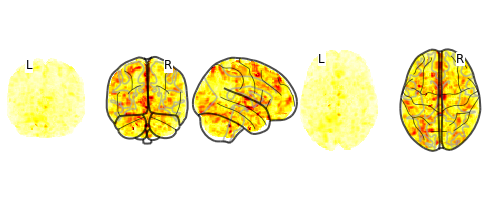

In [111]:
plotting.plot_glass_brain(subj_data.to_nifti())

# now with standardization

In [40]:
beta_series2 = nlt.Brain_Data(['/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0001.nii',
                              '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0002.nii'
                             ])

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,


In [41]:
def clean_beta_series(bs):
    return(nil.image.clean_img(bs.to_nifti(),detrend=False,standardize=True))

In [42]:
bd_nifti = clean_beta_series(beta_series2)

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


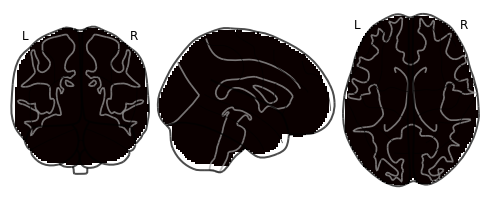

In [43]:
plotting.plot_glass_brain(bd_nifti.slicer[...,0])

In [44]:
np.unique(np.round(bd_nifti.get_fdata(),2))

array([-1.04, -1.  ,  0.  ,  0.96,  1.  ])

Because it's unit variance across two images, every image has to be either a 1 or -1. So we get the above.

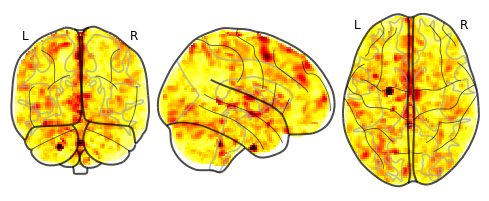

In [16]:
plotting.plot_glass_brain(beta_series2.to_nifti().slicer[...,0])

In [37]:
np.unique(np.round(beta_series2.to_nifti().get_fdata(),2))

array([-31.29, -29.67, -28.78, ...,  19.31,  19.88,  22.14])

This is more like what we should be seeing!

Now let's observe another analysis with 3 images

In [29]:
beta_series3 = nlt.Brain_Data(['/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0001.nii',
                              '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0002.nii',
                               '/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV005/beta_0003.nii'
                             ])

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:598: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(data[all_img + ind], A, b, target_shape,


In [30]:
bd_nifti3 = clean_beta_series(beta_series3)

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(


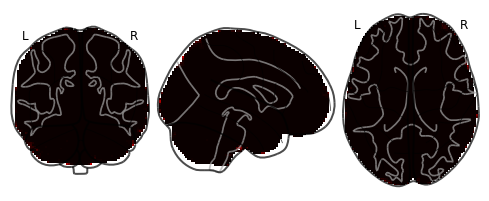

In [31]:
plotting.plot_glass_brain(bd_nifti3.slicer[...,0])

In [34]:
np.unique(np.round(bd_nifti3.get_fdata(),2))

array([-1.41, -1.4 , -1.39, -1.38, -1.37, -1.36, -1.35, -1.34, -1.33,
       -1.32, -1.31, -1.3 , -1.29, -1.28, -1.27, -1.26, -1.25, -1.24,
       -1.23, -1.22, -1.21, -1.2 , -1.19, -1.18, -1.17, -1.16, -1.15,
       -1.14, -1.13, -1.12, -1.11, -1.1 , -1.09, -1.08, -1.07, -1.06,
       -1.05, -1.04, -1.03, -1.02, -1.01, -1.  , -0.99, -0.98, -0.97,
       -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9 , -0.89, -0.88,
       -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8 , -0.79,
       -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7 ,
       -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61,
       -0.6 , -0.59, -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52,
       -0.51, -0.5 , -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43,
       -0.42, -0.41, -0.4 , -0.39, -0.38, -0.37, -0.36, -0.35, -0.34,
       -0.33, -0.32, -0.31, -0.3 , -0.29, -0.28, -0.27, -0.26, -0.25,
       -0.24, -0.23, -0.22, -0.21, -0.2 , -0.19, -0.18, -0.17, -0.16,
       -0.15, -0.14,

I think I've discovered a very important problem in all my work by accident here.

https://github.com/nilearn/nilearn/blob/1607b524/nilearn/image/image.py#L1088
    
Seems like standardization applies to each voxel across the series, not across voxels within each image in the series.

That's why we get either -1 or 1 for every image when there's precisely two images in the series.

When there's 3 images included (as above) we start to get more variance.

This probably shouldn't be done for machine learning?

I'd always intended to standardize each _image_, right? Not each voxel. Now I know...

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


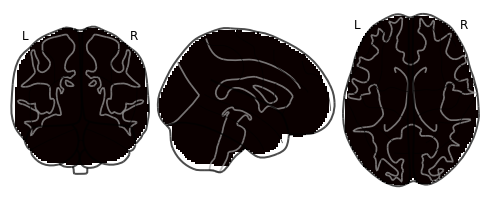

In [46]:
nltools_standardized = beta_series.standardize(method='zscore').to_nifti()
plotting.plot_glass_brain(nltools_standardized.slicer[...,0])

In [47]:
np.unique(np.round(nltools_standardized.get_fdata(),2))

array([-1.,  0.,  1.])

The default in nltools does the same thing. What if we change the axis that is standardized?

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


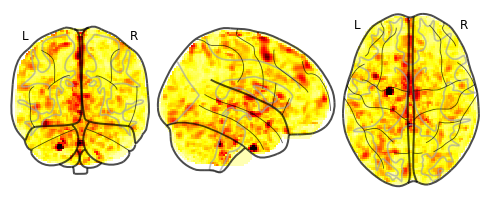

In [48]:
nltools_standardized_axis1 = beta_series.standardize(method='zscore',axis=1).to_nifti()
plotting.plot_glass_brain(nltools_standardized_axis1.slicer[...,0])

In [49]:
np.unique(np.round(nltools_standardized_axis1.get_fdata(),2))

array([-12.77, -12.14, -11.8 , ...,   7.56,   8.03,   8.2 ])

That's what we were wanting all this time! So when will this affect things?

When there's a small number of images, as with any comparison between conditions, we'll get a severely degraded image. So any modeling of conditions is almost certainly ruined and needs to be repeated.

When there's a whole betaseries of, say, 20 images, we're going to see each voxel weighted relative to how that voxel looks in other images. That might not be so bad, but it is still unnecessary.

This might affect within-subject discriminability less, for this reason. But could still be an issue. Across subjects, too, I'm not sure.

So which of the analyses actually use this? Let's check:

 - SST within-subject discriminability. Uses a decoder with the 'standardize' operation itself, which we haven't tested above. Prior to that _also_ uses the `apply_loocv_and_save.load_and_preprocess`, which uses `nil.image.clean_img(` `first_subs_nifti,` `detrend=False,` `standardize=True)`.
 - SST conditions between subject; `TESQ-ml-ns_on_nogo_go.ipynb`: looks at all subjects at once. May not be problematic, but I'm not sure. Uses `apply_loocv_and_save.apply_loocv_and_save`, which passes data through `load_and_preprocess`, which applies neurolearn standardization. So this does it too.
 - WTP analyses: for importing, seems to mostly use `import_wtp_w1_subjs_to_pkl`. I don't see anywhere standardization is done within the import process--not having taken a super thorough look just yet. Main relevant notebook for import is `load_multisubject_brain_data_wtpw1`. Then, it's passed right into `load_multisubject_brain_data_wtpw1`; or alternatively `Wtp_train_avg_test_ind_nested_cv` and then to `cv_train_test_sets`. These use the Decoder standarization but does NOT appear to use any prior standardization.
 
Would be useful to know how the decoder standardizes. It says "mean is put to 0 and their variance is put to 1 in the time dimension" (https://nilearn.github.io/modules/generated/nilearn.decoding.Decoder.html). So this seems to be exactly what we _don't_ want, but the people putting the decoder together thought it was a good idea, so perhaps it is?

It may be that standardization across time is mostly fine; it's just when you have only two images you don't want to it. Although--even with say 4 images you'll only have 4 different points you've standardized on for each image. It's essentially standardizing contrasts across all images and I'm not sure you want to do that.

So--in conclusion--need to think very carefully about what we're standardizing across, but that said, for the most part, this is probably completely normal. 



Would be important to make sure within LOOCV you don't standardize the training set and then leave the validation set 'out of sync'. That would imply, if you're doing custom LOOCV, NOT doing the standardization in the learner itself, and instead doing the standardization before the data got split into train and test.

How do our datasets go for this?

 - For SST within-subject discriminability, LOOCV is taking place strictly within the Decoder object anyway. So, as long as it's being implemented properly within the decoder, there's no problem.
 - For `TESQ-ml-ns_on_nogo_go`, this uses `apply_loocv_and_save`, which uses `dev_wtp_io_utils`, which uses `cv_train_test_sets`. This typically does include a DecoderRegressor that standardizes only the train set, and then applies this to a test set. Problematic. Might be OK if there is _already_ standardization, but actually, even then, re-standardizing will adjust everything and throw the train set out of sync with the test set. ~~So in those circumstances we absolutely can't do standardization within the decoder, and the analyses should actually be re-run!~~ this is probably fine--one would expect the decoder to adjust by means and sds derived from the training data, but I need to check with the nilearn team.
 - For WTP analysis, in `Wtp_train_avg_test_ind_nested_cv`, `cv_train_test_sets` is used. An explicit standardization variable is not set fro the Decoder object, but by default, it does standardization. This is likely to have introuced errors.
 
 

For the following process, there's no standardization: 
- load_multisubject_brain_data_sst_w1-conditions
    - import_sst_cond_w1_subjs_to_pkl
        - dev_wtp_io_utils.get_Brain_Data_betas_for_sub
        
Stnadarization occurs in `load_and_preprocess`, which occurs just _before_ leaning itself, called by `apply_loocv_and_save`. It also occurs (most problematically) within the decoder itself). So it's at the learning stage we need to recode things.

## 

In [1]:
2+2


4